Lab 2 : Open AI Gymnasium
----

As we are steadily advancing towards Reinforcement Learning in class, it's time to get our hands dirty with another cool Python package. Gymnasium, originally developed by OpenAI is a useful tool that is commonly used for solving RL-related challenges. With Gymnasium, users can easily design, implement, and evaluate reinforcement learning algorithms by leveraging predefined environments such as classic control tasks, Atari 2600 games, and more. Furthermore, Gymnasium provides an easy API to implement your own environments!

First, let's get started with installing Gymnasium!

Step 1. Make sure you have python and pip installed. Check the installation of python and pip using 
- `python --version` and `pip --version`
If pip is not installed:
- Follow the steps listed for your respective operating system at [Pip Docs - Installation](https://pip.pypa.io/en/stable/installation/).

Step 2. Now execute `pip install gym` in your terminal to install gymnasium or run the cell below.

In [3]:
!pip3 install gym

Now to verify installation of gym execute the cell below

In [4]:
import gym

Great! Now let's talk about environments! 

The fundamental building block of OpenAI Gym is the `Env` class. It is a Python class that implements a simulator that runs the  environment you want to train your agent in. Open AI Gym comes packed with a lot of environments, such as one where you can move a car up a hill, balance a swinging pendulum etc. Take a moment now to visit [Gymnasium - Farama](https://gymnasium.farama.org/) to see the complete list of environments, along with demonstrations of what the task in each environment is. 

In this lab, we will begin with the `MountainCar` environment. Our goal is to control a car on a track positioned between two mountains. The objective is to drive up the mountain on the right, but the car's engine lacks the power to climb it directly. To solve this problem, we require the car to make strategic back-and-forth movements to build momentum. 

Let's see how we can train our car to climb up the mountain using gymnasium.

## Part 1

In [5]:
# While creating our mountain car environment, render_mode is an optional argument. 
# It is used to render the environment visually when needed.
# For more details, visit https://gymnasium.farama.org/api/env/

env = gym.make('MountainCar-v0', render_mode="rgb_array")

In Reinforcement Learning, we think of two key terms - the `Observation Space` and `Action space`.

The `Observation Space` is the set of all possible observations that an agent can receive from the environment. These observations provide information about the current state of the environment. Observations can be diverse and may include sensor readings, images, or any relevant data that helps the agent make decisions.

For example, for an agent trying to learn how to shoot a target the observation space can include - the agent's current position or location, the position and movement of the target, information about obstacles or barriers in the environment if any, and the agent's ammunition status or the number of bullets remaining.

The `Action Space` represents the set of possible actions that the agent can take to interact with the environment. These actions represent the decisions or movements that the agent can make to interact with the environment.

For example for an agent trying to learn how to shoot a target the action space can include - adjusting the aim or direction of the firearm, pulling the trigger to shoot, reloading the firearm, and changing the stance or position of the agent.

The basic structure of the environment is described by the observation_space and the action_space attributes of the Gym Env class.

## To-do 
Can you guess what the observation space and state space of the mountain car problem would be? Write your answer below. Try to provide 2-3 examples for each.


In [24]:
#### YOUR ANSWER HERE

# Observation space: The car's position on the x-axis (i.e Where the car is between or on either mountain)
#                  : The car's velocity (how fast it is moving in the current direction) 
#                  : Is the car currently moving (related to the velocity)
#                  : Which direction is the car moving (related to the velocity)
#                  : How far is the car from the goal (top of the right hill)
# State space: Accelerating left (move backwards, hit the reverse gear)
#            : Accelerating right (move forwards, hit the accelerator)
#            : Do nothing (coast)

In [7]:
# Observation and action space for mountain-view problem
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


The observation_space for our environment is a Box with shape (2,), and returns two lists with entries of type float32.
The action_space was Discrete with shape (2). 

What do these actually mean? 

Both Box and Discrete are types of data structures called "Spaces" provided by Gym, modeling various aspects of the problem at hand. All of these data structures are derived from the gym.Space base class.

Box, for instance, is used when modeling real-valued quantities, i.e. a continuous space. The printed output can be a bit tricky to read - the first list in the observation space above contains minimum values for the set of quantities that are modeled, and the second list contains the maxima. 

For this particular problem (Mountain Car), the values at index 0 within both lists refer to the minimum and maximum value of the car's position along the x-axis, i.e. the car will always be between x=-1.2 and x=0.6. The values at index 1 represent the range of the velocity, i.e. the car's speed will be between -0.07 and 0.07. Both these values are allowed to vary continuously with the precision of the float32 dtype.

Discrete, on the other hand, signifies that there are a finite number of options to choose from. In this case, Discrete(3) represents the fact that the agent has three choices: 0: accelerate left, 1: don't accelerate, and 2: accelerate right. The easiest way to find descriptions for actions (and their indices) is to visit the [Gymnasium page for that task](https://gymnasium.farama.org/environments/classic_control/mountain_car/).

In [8]:
print("Upper Bound for Env Observation", env.observation_space.high)
print("Lower Bound for Env Observation", env.observation_space.low)

Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]


You can set these upper/lower limits while defining your space, as well as when you are creating an environment.

From here on, remember that an observation for the mountain car environment is a vector of two numbers, representing position and velocity respectively. The middle point between the two mountains in the environment is taken to be the origin, with the right being considered the positive direction and the left being the negative direction.

Now let's talk about how the env class helps the agent interact with the environment!

`reset`: This function returns the initial observation of the environment after placing the agent back in its starting state. Our first observation in any RL task implemented using Gymnasium must be obtained by calling this function. This function should also be called every time a terminal/end state is reached.
`step`: This function takes an action as input, applies it to the environment, and returns the following:
- `observation`: The current state of the environment after the action is taken.
- `reward`: The reward obtained from the action.
- `terminated`: Return true or false, depending on whether the agent has reached a terminal state (as defined under the task).
- `truncated`: Determine if the truncation condition, often a time limit or agent going out of bounds, is satisfied. This can prompt an early episode termination before reaching a terminal state. Think of this as cases that may end a game preemptively.
- `info`: Extra information for debugging or environment-specific details, such as lives remaining.

Next, we demonstrate the step function, which is how we get the agent to execute an action in a Gymnasium environment. For now, we will simply pick a random action from the environment's action space. 

In [25]:
# reset the environment and see the initial observation
obs = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, terminated, truncated, info = env.step(random_action)
print("The new observation is {}".format(new_obs))

The initial observation is (array([-0.4866163,  0.       ], dtype=float32), {})
The new observation is [-0.4858931  0.0007232]


In [17]:
# This step is optional and only needs to be executed if you want to render and view the environment. 
# May be finicky on MacOS. It's fine to skip it for now!
!pip3 uninstall -y pygame
!pip3 install pygame --pre
!pip3 install 'gym[classic_control]'

Found existing installation: pygame 2.6.1
Uninstalling pygame-2.6.1:
  Successfully uninstalled pygame-2.6.1
  Using cached pygame-2.6.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (12 kB)
Using cached pygame-2.6.1-cp312-cp312-macosx_11_0_arm64.whl (12.4 MB)
  Using cached pygame-2.1.0.tar.gz (5.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      
      
      WARNING, No "Setup" File Exists, Running "buildconfig/config.py"
      Using Darwin configuration...
      
      /bin/sh: sdl2-config: command not found
      /bin/sh: sdl2-config: command not found
      /bin/sh: sdl2-config: command not found
      
      ---
      For help with compilation see:
          https://www.pygame.org/wiki/MacCompile
      To contribute to pygame development see:
          https://www.pygame.org/contribut

In [19]:
env.close()
# only way to end a simulation

# To-do
Now it's your turn to try writing code to see how far up the hill this cart can go by taking random steps in this environment.\
Since we are not training the agent at all, we don't expect to see much progress, but this should give us a good idea of how gymnasium works.

#### To Ponder:

In the previous code block where we were taking actions, we didn't use the agent's state and reward to decide the best action from the new state. All the generated actions are random, and you'll be doing the same thing below. We'll learn how to train agents in lecture!

KeyboardInterrupt: 

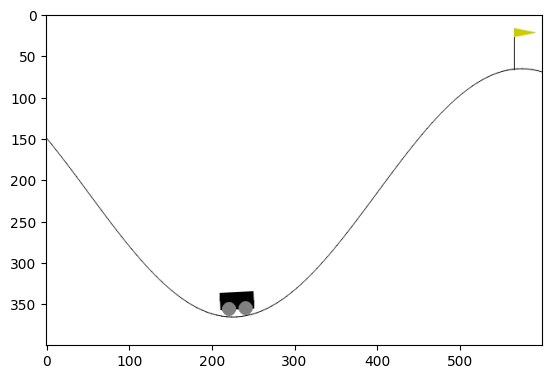

In [40]:
import time
from IPython import display
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt

plt.ion()
env_screen= None

# Number of steps you run the agent for
# This may take a few minutes to execute depending on the number of steps
num_steps = 2000

# reset the environment here
''' YOUR CODE HERE '''
obs, info = env.reset()

plt.figure()

for step in range(num_steps):
    # Render the env here (Rendering might take longer for the cell to execute. 
    # Stop execution once you get a sense of what's happening and move on to the next part of the lab).
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 
    
    # take random action (based on examples above)
    ''' YOUR CODE HERE '''
    random_action = env.action_space.sample()
    
    # apply the action using env.step here
    ''' YOUR CODE HERE '''
    new_obs, reward, terminated, truncated, info = env.step(random_action)
    
    # If the episode is finished (i.e., terminated or truncated), then reset the env and start another one;
    if terminated or truncated:
        obs, info = env.reset()
        break

# Close the env
env.close()

## Part 2

Now that we have seen how to use gymnasium using its default environment, let's see how can we build a custom environment and perform actions in it. This particular custom environment is built using the gymnasium extension for Markov Decision Processes.

Let's consider a 3x3 grid where the action space is to move up, down, left, or right. An action that takes you out of the grid is considered invalid. The red cells in the grid represent a reward of -20, the yellow cell has a reward of +5 and the green one has a reward of +10. Consider the green cell as the final goal state, which is where we want our agent to go. There is an equal probability of taking any valid action from a given cell. 

Here's how the grid is defined **(on a Euclidean plane)**:

Cell 0 - 0,0 (start)\
Cell 1 - 0,1\
Cell 2 - 0,2\
Cell 3 - 1,0\
Cell 4 - 1,1\
Cell 5 - 1,2\
Cell 6 - 2,0 (goal)\
Cell 7 - 2,1\
Cell 8 - 2,2

<div><img src="./grid.png", style="width:400px"/></div>

In [39]:
!pip3 install matrix-mdp-gym

In [64]:
import numpy as np

num_states = 9 # total number of cells
num_actions = 4 # up, down, left, right
num_terminal_states = 1 # initilaise the number of terminal goal states

In [65]:
#To-do:
# Initialise the action map as a dictionary, just to save human readable labels. 0 maps to 'up', 1 to 'down', 2 to 'left', and 3 to 'right'.
A = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right'
}
print(A)

{0: 'up', 1: 'down', 2: 'left', 3: 'right'}


In [66]:
# To-do: fill in and complete the state_action_map here, this is a map of all the valid actions from a given state. 
# Values for cell 0 and 6 are filled in for you
# (from cell 0 we can go to the cell above it, or the cell to its right. 
# The action map values, therefore, are 0 and 3. For cell 6, since this state is terminal, there are no actions from it.

# While we are hardcoding this for now, you should consider writing code 
# that generates this map using the rules of your environment in general.

states_actions_map = {
    0: [0, 3],       # From cell 0, you can move up (0), or right (3)
    # COMPLETE THE MAP

    # My code
    1: [0, 2, 3],    # From cell 1, you can move up (0), left (2), or right (3)
    2: [0, 2],       # From cell 2, you can move up (0) or left (2)
    3: [0, 1, 3],    # From cell 3, you can move up (0), down (1), or right (3)
    4: [0, 1, 2, 3], # From cell 4, you can move up (0), down (1), left (2), or right (3)
    5: [0, 1, 2],    # From cell 5, you can move up (0), down (1), or left (2)

    6: [],           # Cell 6 is the terminal state

    # My code
    7: [1, 2, 3],    # From cell 7, you can move down (1), left (2), or right (3)
    8: [1, 2]        # From cell 8, you can move down (1) or left (2)
}

In [68]:
# 1. Initialize transition and reward matrices.

T = np.zeros((num_states, num_states, num_actions))
R = np.zeros((num_states, num_states, num_actions))

# 2. Fill in the transition matrix with the correct values.

    # The matrix T represents transition probabilities, i.e., the probability of moving to state j from state i using action a. 
    # In uncertain environments, an action may have a small probability of failing and leading you to a different state than intended.
    # For now, assume that the probability of failure is 0, i.e., an up action, for instance, 
    # will always take you to the cell above your current state, as long as such a cell exists. 

    # Note that T is a 3-dimensional matrix. Entries should be made at the index [new_state][current_state][action].
    # For example, T[1][0][3] = 1 means that if we take action 3 (right) from cell 0 (start), the probability of reaching the cell 1 is 1.
    # Use numpy operations to fill in the correct values in the matrix T.
    
'''
YOUR CODE HERE
'''
for state, actions in states_actions_map.items():
    for action in actions:
        if action == 0:  # Up
            if state >= 3:  # Valid transition for states in row 1 or 2 (i.e., state >= 3)
                T[state - 3][state][action] = 1
        elif action == 1:  # Down
            if state <= 5:  # Valid transition for states in row 0 or 1 (i.e., state <= 5)
                T[state + 3][state][action] = 1
        elif action == 2:  # Left
            if state % 3 != 0:  # Valid transition for states not in the first column
                T[state - 1][state][action] = 1
        elif action == 3:  # Right
            if state % 3 != 2:  # Valid transition for states not in the last column
                T[state + 1][state][action] = 1

# 3. Fill in the reward matrix with the correct values.

    # The matrix R represents the rewards obtained by moving to state j from state i using action a. 
    # The red cells in the grid have a reward of -20, the yellow cell has a reward of +5, and the green one has a reward of +10.
    # Assume rewards don't depend on the action used or the cell from which the agent moved to one of these cells for now.

    # Entries should once again be made at the index [new_state][current_state][action].
    # For example, R[2][1][3] = -20 indicates that if we take action 3 from cell 1 and reach cell 2, the reward is -20.
    # Update the entries in the matrix R with the correct values below. 

'''
YOUR CODE HERE
'''
# Red cells (1, 2, 3, 5, 7, 8) give -20, Yellow cell (4) gives +5, Green cell (6) gives +10
reward_map = {
    1: -20,
    2: -20,
    3: -20,
    5: -20,
    7: -20,
    8: -20,
    4: +5,
    6: +10
}

for state, actions in states_actions_map.items():
    for action in actions:
        # Determine the new state based on the action
        new_state = None
        if action == 0:  # Up
            if state >= 3:
                new_state = state - 3
        elif action == 1:  # Down
            if state <= 5:
                new_state = state + 3
        elif action == 2:  # Left
            if state % 3 != 0:
                new_state = state - 1
        elif action == 3:  # Right
            if state % 3 != 2:
                new_state = state + 1

        # If a valid new state exists, assign the reward
        if new_state is not None and new_state in reward_map:
            R[new_state][state][action] = reward_map[new_state]

# To display the filled transition and reward matrices
print("Transition Matrix T:")
print(T)
print("\nReward Matrix R:")
print(R)

Transition Matrix T:
[[[0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0

In [69]:
# P_0 is simply the initial probability distribution. This represents where your agent is at the beginning.
# If there is only one possible start state, the probability distribution is simply a one-hot vector,
# where the probability at the start state is 1 and 0 elsewhere.

import numpy as np
''' Write Start state '''
P_0 = np.zeros(num_states)  # To create a zero vector of length num_states
P_0[0] = 1  # Set the probability of the start state (which is state 0) to 1

print("Initial Probability Distribution P_0:")
print(P_0)

Initial Probability Distribution P_0:
[1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
import matrix_mdp
import gymnasium as gym
env = gym.make('matrix_mdp/MatrixMDP-v0', p_0=P_0, p=T, r=R)

In [71]:
#First, we reset the environment and get the initial observation.
observation, info = env.reset()

Below, write the code for random exploration, i.e. randomly choosing an action at each time step and executing it.

A random action is simply a random integer between 0 and the number of actions (num_actions not inclusive).
However, you should make sure that the chosen action can actually be taken from the current state (i.e., the chosen action is valid).

Keep track of the total reward in each episode, and reset the environment when the episode terminates.

Print the average reward obtained over 10000 episodes. 

In [72]:
# setting total reward as zero
total_rewards = 0.0

In [63]:
import random
import numpy as np

# To-Do:
# For each episode, collect the reward the agent earns and store it.
# After the end of all 10000 episodes, we are going to take the average reward earned by the agent.

reward_list = []

for i in range(10000):
    observation, info = env.reset()

    total_rewards = 0

    while True:
        # To get the current state
        current_state = observation

         # If current_state is None, print an error and break
        if current_state is None:
            print(f"Error: current_state is None at episode {i}")
            break
        
        # Then pick a valid random action for the current state
        try:
            valid_actions = states_actions_map[current_state]
        except KeyError:
            print(f"Error: Invalid state {current_state} at episode {i}") # if it is 'None'
            break


        # Pick an action using the random Python module random until we have a valid action for that cell
        # Hint: use states_actions_map in conjunction with the random module
        ''' Write Code '''
        #valid_actions = states_actions_map[current_state] # Put this line in the try to account for the key error
        action = random.choice(valid_actions)

        
        # Get a new observation, reward, terminated and other information here using the env.step() function
        ''' Write Code '''
        #new_observation, reward, terminated, truncated, info = env.step(action) # put this in the if statement below
        
        # Update rewards
        ''' Write Code '''

        step_result = env.step(action)
        if len(step_result) == 5:  # Gym v0.26+
            new_observation, reward, terminated, truncated, info = step_result
        else:  # Older Gym versions
            new_observation, reward, terminated, info = step_result
            truncated = False  # Default truncated value

        # Ensure reward is not None (handle this case)
        if reward is None:
            reward = 0  # Assign a default reward of 0 if its None

        total_rewards += reward

        # Update the current observation
        observation = new_observation

        # break this loop if an end state has been reached
        if terminated or truncated:
            break
        reward_list.append(total_rewards)

# calculate and print the average reward here
avg_reward = np.mean(reward_list)
print("Average reward obtained: ", avg_reward)


Error: current_state is None at episode 0
Error: current_state is None at episode 1
Error: current_state is None at episode 2
Error: current_state is None at episode 3
Error: current_state is None at episode 4
Error: current_state is None at episode 5
Error: current_state is None at episode 6
Error: current_state is None at episode 7
Error: current_state is None at episode 8
Error: current_state is None at episode 9
Error: current_state is None at episode 10
Error: current_state is None at episode 11
Error: current_state is None at episode 12
Error: current_state is None at episode 13
Error: current_state is None at episode 14
Error: current_state is None at episode 15
Error: current_state is None at episode 16
Error: current_state is None at episode 17
Error: current_state is None at episode 18
Error: current_state is None at episode 19
Error: current_state is None at episode 20
Error: current_state is None at episode 21
Error: current_state is None at episode 22
Error: current_state 

Hope this lab helped you understand how to set up and navigate an environment in Gymnasium. 
As always, please don't hesitate to reach out to the instructor or the TAs if you have any questions!